### Setup Code
---

In [1]:
# Imports
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Functions
def date_split(date_str):
    '''
    Returns a dictionary of pd datetime split by year, month, day
    '''
    year  = date_str[6:10]
    month = date_str[3:5]
    day   = date_str[0:2]

    return {'year':year, 'month':month, 'day':day}

def calculate_age(birth_date):
    '''
    Calculates age given an input birthdate. 
    '''
#     print(birth_date)
    
    birth = date_split(birth_date)
    curr  = date_split('31/05/2020')

    birth_num = int(birth['month'] + birth['day'])
    curr_num  = int(curr['month'] + curr['day'])

    if birth_num <= curr_num:
        age = int(curr['year']) - int(birth['year'])
    else:
        age = int(curr['year']) - int(birth['year']) - 1

    return age

In [3]:
# Merge the Last Transaction Date date with respective customers. 
last_path = r'C:\Users\MarkHughes\Documents\last_dates.csv'
last_date = pd.read_csv(last_path)

cust_path = r'C:\Users\MarkHughes\JanusBankingChurn\customers_tm1_e.csv'
customers = pd.read_csv(cust_path)

last_date.drop(columns='Unnamed: 0', inplace=True)

customer_info = pd.merge(last_date, customers, on='customer_id', how='left')

customer_info['dob'] = customer_info['dob'].apply(lambda x : str(x))

customer_info[customer_info['dob'] == '']

,customer_id,most_recent_trans,dob,state,start_balance,creation_date


In [4]:
customer_info.dropna(inplace=True)

In [5]:
customer_info = customer_info.reset_index()

### Adding a column for whether or not customer ever churned, and age
---

In [6]:
# Add Churn column
for i in range(len(customer_info)):
    if customer_info.loc[i, 'most_recent_trans'][:7] == '2020-05':
        customer_info.loc[i, 'churn'] = 0
    else:
        customer_info.loc[i, 'churn'] = 1

In [7]:
# Add Age Column 
customer_info['Age'] = customer_info['dob'].apply(calculate_age) 

In [8]:
customer_info

,index,customer_id,most_recent_trans,dob,state,start_balance,creation_date,churn,Age
0,0,91,2007-03-30,01/07/1993,California,10180.56,31/01/2007,1.0,26
1,1,92,2008-03-14,05/12/1985,New York,4757.68,31/01/2007,1.0,34
2,2,93,2007-11-30,19/11/1987,Minnesota,6796.72,31/01/2007,1.0,32
3,3,94,2007-10-31,23/03/1981,Minnesota,9870.48,31/01/2007,1.0,39
4,4,95,2008-08-31,06/04/1970,California,12500.72,31/01/2007,1.0,50
...,...,...,...,...,...,...,...,...,...
115998,116005,116102,2020-05-31,02/03/1969,Georgia,3110.96,31/05/2020,0.0,51
115999,116006,116103,2020-05-31,25/10/1966,New York,12063.92,31/05/2020,0.0,53
116000,116007,116104,2020-05-31,30/04/1986,Oklahoma,11011.36,31/05/2020,0.0,34
116001,116008,116105,2020-05-31,25/08/1983,New Mexico,8861.08,31/05/2020,0.0,36


### Starting Balance Distribution for churners and non churners. 
---

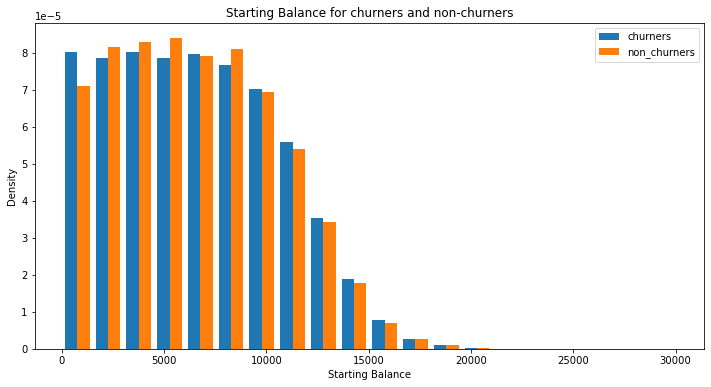

In [9]:
# Set boundaries for starting Balance.
for i in range(len(customer_info)):
    if customer_info.loc[i, 'start_balance'] > 1000000 or customer_info.loc[i, 'start_balance'] < 0:
        customer_info.loc[i, 'start_balance'] = 0
        
# Plot the Starting Balances proportions for churners and non-churners.
churned  = customer_info[customer_info['churn'] == 1]
no_churn = customer_info[customer_info['churn'] == 0]

churn_bal    = churned['start_balance']
no_churn_bal = no_churn['start_balance']

fig, ax = plt.subplots(figsize=(12,6))
ax.hist([churn_bal, no_churn_bal], density=True, bins=20)
ax.legend(['churners', 'non_churners'])
ax.set_ylabel('Density')
ax.set_xlabel('Starting Balance')
_ = ax.set_title('Starting Balance for churners and non-churners') 

### Churn Rate by age
---

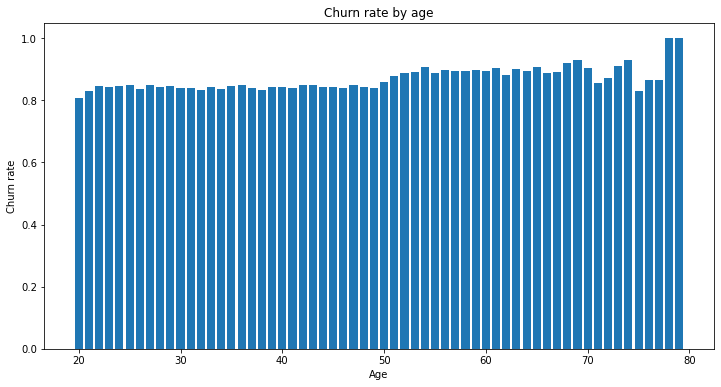

In [10]:
age_set_list = list(set(customer_info['Age']))

ages_list = []
age_rates = []

for i in age_set_list: 
    age_mask = customer_info['Age'] == i
    
    customers_by_age = customer_info[age_mask]
    
    churn_mask    = customers_by_age['churn'] == 1
    no_churn_mask = customers_by_age['churn'] == 0
    
    churners     = len(customers_by_age[churn_mask])
    non_churners = len(customers_by_age[no_churn_mask])
                       
    proportion   = churners/(non_churners+churners)
    
    ages_list.append(i)
    age_rates.append(proportion)
    
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ages_list, age_rates)
ax.set_xlabel('Age')
ax.set_ylabel('Churn rate')
_ = ax.set_title('Churn rate by age')

In [11]:
customer_info

,index,customer_id,most_recent_trans,dob,state,start_balance,creation_date,churn,Age
0,0,91,2007-03-30,01/07/1993,California,10180.56,31/01/2007,1.0,26
1,1,92,2008-03-14,05/12/1985,New York,4757.68,31/01/2007,1.0,34
2,2,93,2007-11-30,19/11/1987,Minnesota,6796.72,31/01/2007,1.0,32
3,3,94,2007-10-31,23/03/1981,Minnesota,9870.48,31/01/2007,1.0,39
4,4,95,2008-08-31,06/04/1970,California,12500.72,31/01/2007,1.0,50
...,...,...,...,...,...,...,...,...,...
115998,116005,116102,2020-05-31,02/03/1969,Georgia,3110.96,31/05/2020,0.0,51
115999,116006,116103,2020-05-31,25/10/1966,New York,12063.92,31/05/2020,0.0,53
116000,116007,116104,2020-05-31,30/04/1986,Oklahoma,11011.36,31/05/2020,0.0,34
116001,116008,116105,2020-05-31,25/08/1983,New Mexico,8861.08,31/05/2020,0.0,36


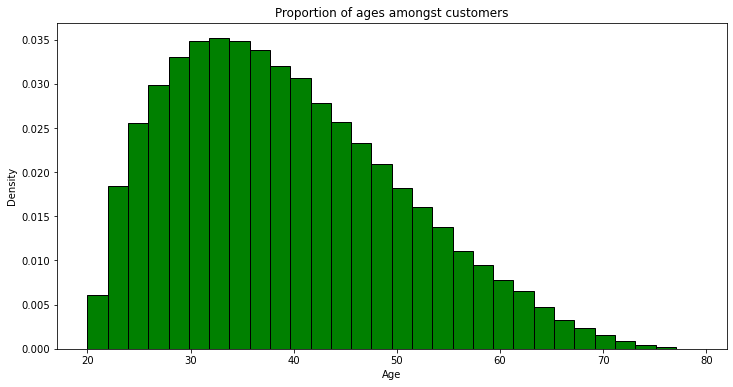

In [12]:
# PLot the proportion by age group

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(customer_info['Age'], bins=30, density=True, color='green', ec='black')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
_ = ax.set_title('Proportion of ages amongst customers')

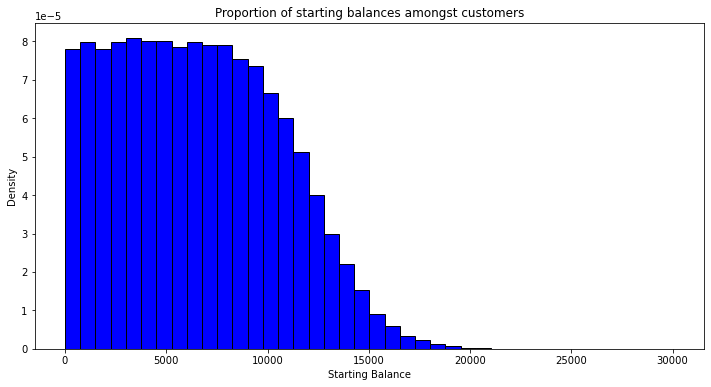

In [13]:
# PLot the proportion by starting balance

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(customer_info['start_balance'], bins=40, density=True, color='blue', ec='black')
ax.set_xlabel('Starting Balance')
ax.set_ylabel('Density')
_ = ax.set_title('Proportion of starting balances amongst customers')

In [14]:
customer_info['creation_date'] = customer_info['creation_date'].apply(lambda x: x[6:10])

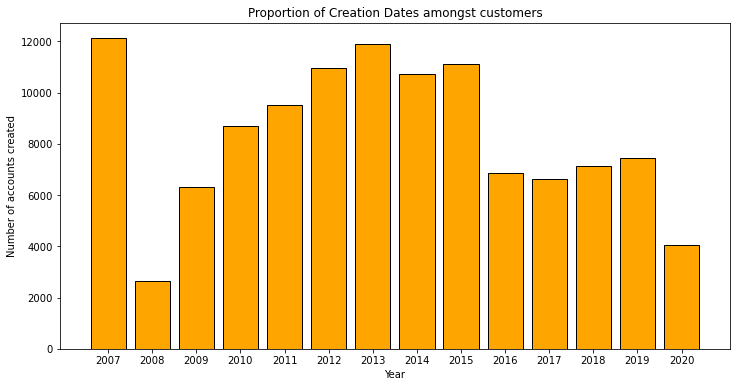

In [15]:
dates = []
datec = []

years = sorted(set(customer_info['creation_date']), reverse=False)

for i in years:
    mask = customer_info['creation_date'] == i
    
    dates.append(i)
    datec.append(len(customer_info[mask]))

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(dates, datec, color='orange', ec='black')
ax.set_xlabel('Year')
ax.set_ylabel('Number of accounts created')
_ = ax.set_title('Proportion of Creation Dates amongst customers')

In [28]:
state_df = pd.read_csv('state_pop.csv')

pop_by_state = dict(list(zip(state_df['state'], state_df['value'])))

pop_by_state

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Illinois': 12671821,
 'Pennsylvania': 12801989,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6949503,
 'Tennessee': 6833174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017825,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'West Virginia': 1792147,
 'Idaho': 1787065,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhode Island': 1059361,
 'Del

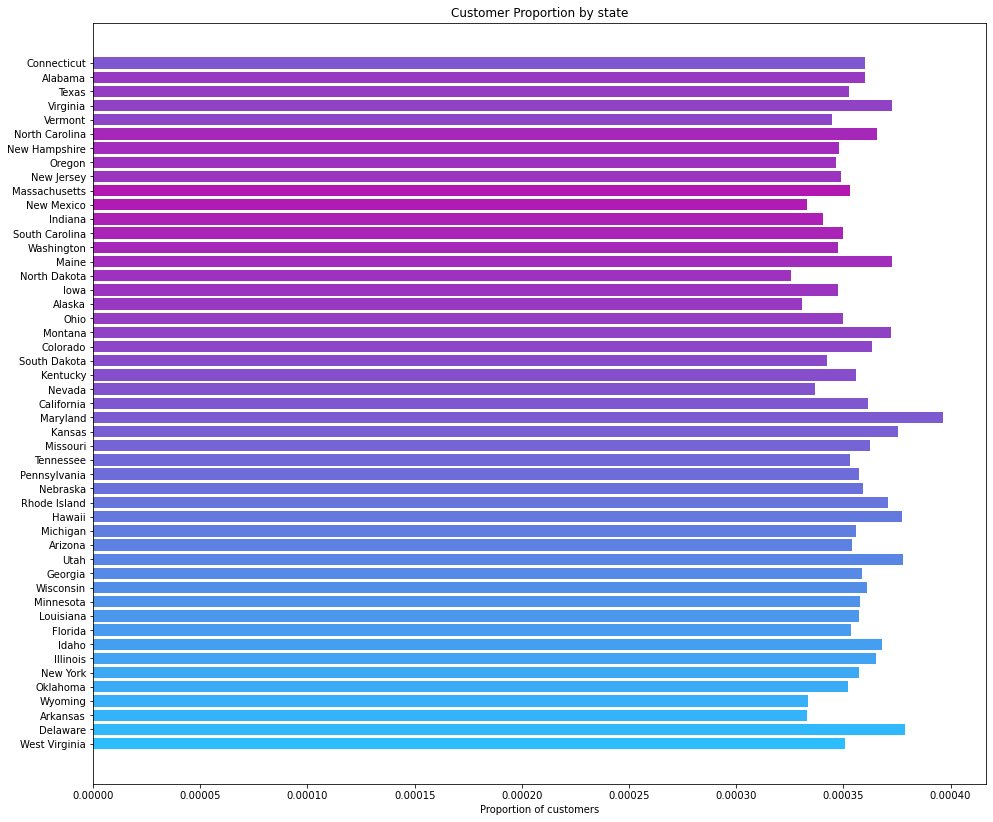

In [48]:
# PLot the proportion by State

import random

states = []
statec = []

stateset = list(set(customer_info['state']))
                
stateset.remove('CALIFORNIA')               

for i in stateset:
    mask = customer_info['state'] == i
    
    states.append(i)
    statec.append(len(customer_info[mask])/int(pop_by_state[i]))

# data = pd.DataFrame(list(zip(states, statec)), columns=['a', 'b'])
# data = data.sort_values('b')
# states = data['a']
# statec = data['b']

CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9']
# number_of_colors = len(states)

# color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(number_of_colors)]

# colors = dict(zip(states, color))
# labels = list(colors.keys())

# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

fig, ax = plt.subplots(figsize=(16,14))
ax.barh(states, statec, color=CB91_Grad_BP)
ax.set_xlabel('Proportion of customers')
_ = ax.set_title('Customer Proportion by state')
# plt.tight_layout()
# ax.legend(handles, labels, title='States by colour \n\n')
# ax.set_yticks([])